In [68]:
import pandas as pd
import numpy as np

In [69]:
data  = pd.read_csv("TweetsWithSentiments.csv")
data = data[["id", "Tweets", "Sentiment"]]
data.head(2)

,id,Tweets,Sentiment
0,0,भारत समेत दुनिया भर में छंटनी की रफ्तार थमने क...,0
1,1,Accenture Layoffs: యాక్సెంచర్ లో 19 వేల మంది ఉ...,0


In [70]:
########## PERFROMING EDA ########

In [71]:
# Check the shape of the data
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 5001
Number of columns: 3


In [72]:
# Check for missing values
print(f'Number of missing values:\n{data.isnull().sum()}')

Number of missing values:
id           0
Tweets       0
Sentiment    0
dtype: int64


In [73]:
# Check the data types of each column
print(f'Data types of each column:\n{data.dtypes}')

Data types of each column:
id            int64
Tweets       object
Sentiment     int64
dtype: object


In [74]:
# Generate descriptive statistics for numerical columns
print(f'Descriptive statistics for numerical columns:\n{data.describe()}')

Descriptive statistics for numerical columns:
                id    Sentiment
count  5001.000000  5001.000000
mean   2500.000000    -0.080184
std    1443.808678     0.639507
min       0.000000    -1.000000
25%    1250.000000     0.000000
50%    2500.000000     0.000000
75%    3750.000000     0.000000
max    5000.000000     1.000000


C:\Users\imadi\AppData\Local\Temp\ipykernel_5784\3343181059.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


<Axes: >

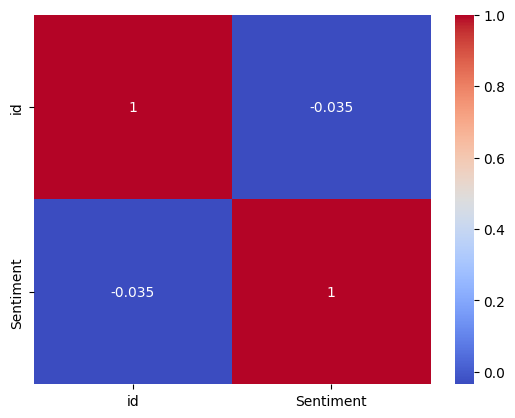

In [75]:
import seaborn as sns
# Visualize the correlation between features
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [76]:
############# EVALUATION PARAMETERS ##############

In [77]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [78]:
X = data.drop(columns=["id","Tweets"])
y = data['Sentiment']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
# Generate predictions for the test set
y_pred = clf.predict(X_test)
y_test =  clf.predict(X_test)

In [82]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cm)

Confusion matrix
 [[244   0   0]
 [  0 583   0]
 [  0   0 174]]


In [83]:
# Compute the accuracy, F1 score, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is", accuracy*100, "%")

Accuracy of the model is 100.0 %


In [84]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred , average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision = ", precision)
print("Recall = ", recall)
print("F1-score = ", f1)

Precision =  1.0
Recall =  1.0
F1-score =  1.0


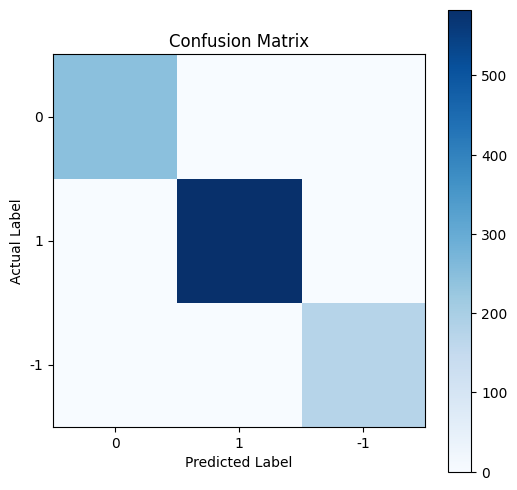

In [85]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, list(set(y)))
plt.yticks(tick_marks, list(set(y)))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()